### Aufgabe 1

In [2]:
# download alice.txt as plain text from gutenberg project: https://www.gutenberg.org/ebooks/11
# (also remove text lines in the beginning and end which do not belong to the book)
f = open("alice.txt", "r", encoding="utf-8-sig")
aliceText = f.read() # Einlesen der Datei
f.close()

In [3]:
print(aliceText[:1000])

Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends in a Little Bill
 CHAPTER V.     Advice from a Caterpillar
 CHAPTER VI.    Pig and Pepper
 CHAPTER VII.   A Mad Tea-Party
 CHAPTER VIII.  The Queen’s Croquet-Ground
 CHAPTER IX.    The Mock Turtle’s Story
 CHAPTER X.     The Lobster Quadrille
 CHAPTER XI.    Who Stole the Tarts?
 CHAPTER XII.   Alice’s Evidence




CHAPTER I.
Down the Rabbit-Hole


Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into
the book her sister was reading, but it had no pictures or
conversations in it, “and what is the use of a book,” thought Alice
“without pictures or conversations?”

So she was considering in her own mind (as well as she could, for the
hot day made her feel very 

In [4]:
print(aliceText[-1000:])


wind, and the pool rippling to the waving of the reeds—the rattling
teacups would change to tinkling sheep-bells, and the Queen’s shrill
cries to the voice of the shepherd boy—and the sneeze of the baby, the
shriek of the Gryphon, and all the other queer noises, would change
(she knew) to the confused clamour of the busy farm-yard—while the
lowing of the cattle in the distance would take the place of the Mock
Turtle’s heavy sobs.

Lastly, she pictured to herself how this same little sister of hers
would, in the after-time, be herself a grown woman; and how she would
keep, through all her riper years, the simple and loving heart of her
childhood: and how she would gather about her other little children,
and make _their_ eyes bright and eager with many a strange tale,
perhaps even with the dream of Wonderland of long ago: and how she
would feel with all their simple sorrows, and find a pleasure in all
their simple joys, remembering her own child-life, and the happy summer
days.

THE END

### Aufgabe 2

In [19]:
import nltk

tokens_nltk = nltk.word_tokenize(aliceText.lower())

### Aufgabe 3

In [20]:
tokens[:30]

['alice’s',
 'adventures',
 'in',
 'wonderland',
 'by',
 'lewis',
 'carroll',
 'the',
 'millennium',
 'fulcrum',
 'edition',
 '3.0',
 'contents',
 'chapter',
 'i.',
 'down',
 'the',
 'rabbit-hole',
 'chapter',
 'ii.',
 'the',
 'pool',
 'of',
 'tears',
 'chapter',
 'iii.',
 'a',
 'caucus-race',
 'and',
 'a']

### Aufgabe 4

In [21]:
from nltk.probability import FreqDist
cntWords = FreqDist(tokens)

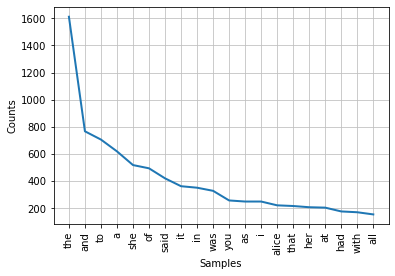

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [22]:
cntWords.plot(20)

### Aufgabe 5

In [54]:
# Späterer Plot zeigt, dass wir Satzzeichen entfernen sollten
import string
punctuation = string.punctuation + "“" + "”" + "’"

aliceTextStripped = [letter for letter in aliceText if letter not in punctuation]
aliceTextStripped = "".join(aliceTextStripped) # vorherige listcomprehension erzeugt Liste von Buchstaben; hier machen wir wieder einen Text daraus.

tokens_stripped = nltk.word_tokenize(aliceTextStripped.lower())

In [59]:
# Alternative Möglichkeit zum Entfernen der Satzzeichen:
# aliceTextStripped = aliceText

# for punct in punctuation:
#     aliceTextStripped = aliceTextStripped.replace(punct, '')

In [60]:
from nltk.corpus import stopwords

stop_words = stopwords.words("english")

tokens_without_stopwords = [word for word in tokens_stripped if word not in stop_words]

In [61]:
cntWords_without_stopwords = FreqDist(tokens_without_stopwords)

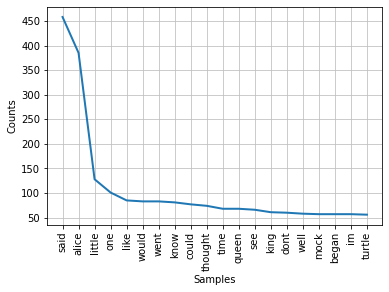

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [62]:
cntWords_without_stopwords.plot(20)

### Aufgabe 6

In [73]:
most_common_tuples = cntWords_without_stopwords.most_common(10)

In [75]:
most_common_words = [word for word, _  in most_common_tuples]

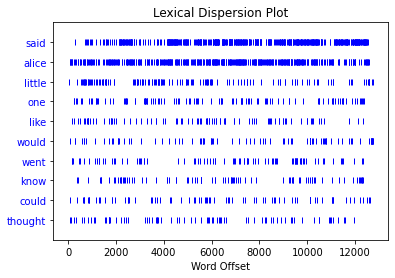

In [79]:
text = nltk.Text(tokens_without_stopwords)
text = text.dispersion_plot(most_common_words)

### Aufgabe 7

In [82]:
tokens_nltk = nltk.word_tokenize(aliceText.lower()) # Sicherheitshalber verwenden wir den Ursprungstext, da part of speech tagging - je nach Algorithmus - Kontextinformation benötigt

In [89]:
tags = nltk.pos_tag(tokens_nltk)

In [109]:
adjs = [word.lower() for word, tag in tags if tag == 'JJ']

### Aufgabe 8

In [110]:
import collections
adjs_cnt = collections.Counter(adjs)

Tagging offenbar mit einigen Missklassifizierungen

### Aufgabe 9

In [111]:
adjs_cnt.most_common(5)

[('i', 170), ('’', 165), ('”', 149), ('little', 125), ('“', 122)]

In [112]:
mostcommonadjs = [word for word, _ in adjs_cnt.most_common(5)]

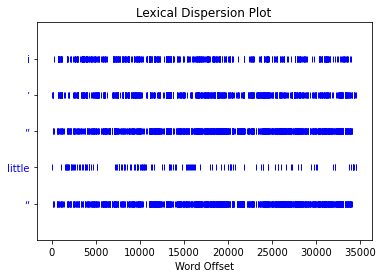

In [113]:
text = nltk.Text(tokens_nltk)
text.dispersion_plot(mostcommonadjs)

In [120]:
adjs_alice = []

for idx, tuptag in enumerate(tags):
    if idx > 0: # erstes Element hat keinen Vorgänger
        word, _ = tuptag

        prevword, prevtag = tags[idx - 1]
        
        word = word.lower()
        prevword = prevword.lower()

        if word == 'alice' and prevtag == 'JJ':  # JJ ist das Tag für Adjektiv laut Doku
            adjs_alice.append(prevword)

In [122]:
adjs_alice_cnt = collections.Counter(adjs_alice)

In [123]:
adjs_alice_cnt

Counter({'rabbit-hole': 1,
         'poor': 11,
         'little': 3,
         'thought': 7,
         '”': 30,
         'noticed': 1,
         'foolish': 1,
         'pleaded': 1,
         'upon': 2,
         'interrupted': 1})